### A1

In [3]:
import pandas as pd
import numpy as np

# Function to load data
def load_data(filepath):
    return pd.read_excel(filepath)

# Function to segregate data into matrices A and C
def segregate_data(data, feature_columns, target_column):
    A = data[feature_columns].values
    C = data[target_column].values
    return A, C

# Function to calculate dimensionality of the vector space
def calculate_dimensionality(matrix):
    return matrix.shape[1]

# Function to count number of vectors in the vector space
def count_vectors(matrix):
    return matrix.shape[0]

# Function to calculate the rank of a matrix
def calculate_rank(matrix):
    return np.linalg.matrix_rank(matrix)

# Function to calculate the pseudo-inverse of a matrix and find cost vector
def calculate_pseudo_inverse_cost(matrix_A, matrix_C):
    A_pinv = np.linalg.pinv(matrix_A)
    cost_vector = np.dot(A_pinv, matrix_C)
    return cost_vector

KeyboardInterrupt: 

In [ ]:
# Main program
if __name__ == "__main__":
    # Load the data
    filepath = 'C:\\Users\\sarayu krishna\\Downloads\\Lab Session Data.xlsx'
     
    data = load_data(filepath)
    
    # Define feature and target columns
    feature_columns = ['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']
    target_column = 'Payment (Rs)'
    
    # Segregate data into matrices A and C
    A, C = segregate_data(data, feature_columns, target_column)
    
    # Calculate and print dimensionality of the vector space
    dimensionality = calculate_dimensionality(A)
    print(f"Dimensionality of the vector space: {dimensionality}")
    
    # Calculate and print number of vectors in the vector space
    num_vectors = count_vectors(A)
    print(f"Number of vectors: {num_vectors}")
    
    # Calculate and print the rank of Matrix A
    rank_A = calculate_rank(A)
    print(f"Rank of Matrix A: {rank_A}")
    
    # Calculate and print the cost vector
    cost_vector = calculate_pseudo_inverse_cost(A, C)
    print(f"Cost vector: {cost_vector}")

### A2

In [ ]:
# Function to calculate model vector X
def calculate_model_vector(matrix_A, matrix_C):
    A_pinv = np.linalg.pinv(matrix_A)
    model_vector = np.dot(A_pinv, matrix_C)
    return model_vector

In [ ]:
if __name__ == "__main__":
     model_vector = calculate_model_vector(A, C)
     print(f"Model vector X for predicting cost: {model_vector}")

### A3

In [ ]:
data

In [ ]:
purchase_df = data[['Customer','Candies (#)','Mangoes (Kg)','Milk Packets (#)','Payment (Rs)']]

In [ ]:
purchase_df

In [ ]:
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Function to classify customers based on payment
def classify_customers(data, payment_column, threshold=200):
    """
    Classify customers as 'RICH' or 'POOR' based on their payment amount.
    
    Parameters:
    - data (DataFrame): The DataFrame containing customer data.
    - payment_column (str): The name of the column with payment information.
    - threshold (float): The payment threshold to classify as 'RICH' or 'POOR'.
    """
    data['Class'] = np.where(data[payment_column] > threshold, 'RICH', 'POOR')
    return data

# Function to train and evaluate a classifier model
def train_evaluate_classifier(data, feature_columns, class_column):
    """
    Train a logistic regression model and evaluate its performance.
    
    Parameters:
    - data (DataFrame): The DataFrame containing features and target column.
    - feature_columns (list): List of feature column names.
    - class_column (str): The name of the column with class labels.
    """
    X = data[feature_columns]
    y = data[class_column]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=37)
    
    # Initialize and train the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    return accuracy, report

In [ ]:
if __name__ == "__main__":
      
    # Define feature columns and class column
    feature_columns = ['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']
    class_column = 'Class'
    
    # Classify customers as RICH or POOR
    purchase_df = classify_customers(purchase_df, 'Payment (Rs)')
    
    # Train and evaluate the classifier model
    accuracy, report = train_evaluate_classifier(purchase_df, feature_columns, class_column)
    
    # Print results
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)


In [ ]:
# A4
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

fp = r"C:\Users\sarayu krishna\Downloads\Lab Session Data.xlsx"
excel_data = pd.ExcelFile(fp)

stock = pd.read_excel(fp, sheet_name='IRCTC Stock Price')

data = stock['Price'].dropna()
meanprice = statistics.mean(data)
print(meanprice)
varianceprice = statistics.variance(data)
print(varianceprice)

wednesdayp = stock[stock['Day'] == 'Wed']['Price']
meanwednesdayp = statistics.mean(wednesdayp)

aprilp = stock[stock['Month'] == "Apr"]['Price']
meanaprilp = statistics.mean(aprilp)

chgdata = stock['Chg%']
loss = len(chgdata[chgdata < 0]) / len(chgdata)

wednesdaychg = stock[stock['Day'] == 'Wed']['Chg%'].dropna()
profitwed = len(wednesdaychg[wednesdaychg > 0]) / len(wednesdaychg)

profitgwednesday = (profitwed * (len(wednesdaychg) / len(chgdata)))

plt.figure(figsize=(10, 6))
plt.scatter(stock['Day'], stock['Chg%'], alpha=0.5)
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.title('Chg% vs Day of the Week')
plt.show()

(meanprice, varianceprice, meanwednesdayp, meanaprilp, loss, profitwed, profitgwednesday)

Data Types:
 Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured   

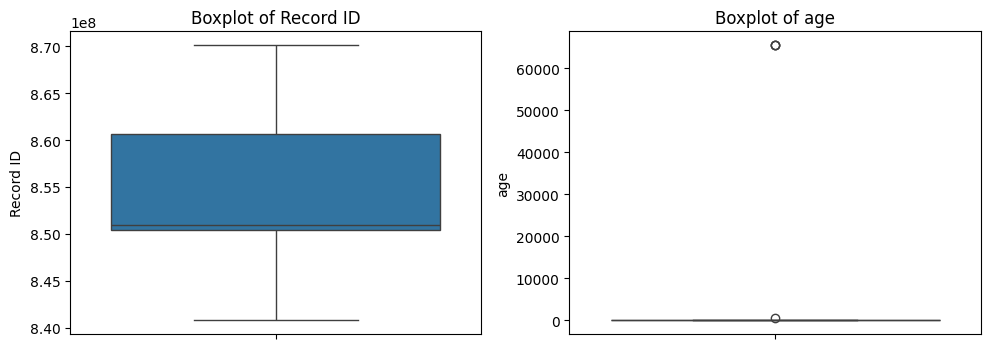

In [4]:
#A5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the Excel data
file_path = r"C:\Users\sarayu krishna\Downloads\Lab Session Data.xlsx"
sheet_name = "thyroid0387_UCI"
thyrdata = pd.read_excel(file_path, sheet_name=sheet_name)

# 1. Identify the datatype of each attribute
def identify_types(data):
    data_types = data.dtypes
    return data_types

# 2. Encoding categorical attributes
def enc(data):
    enc_data = data.copy()
    labelenc = {}
    onehot_encoders = {}
    
    for column in data.columns:
        if data[column].dtype == 'object' or data[column].dtype == 'mixed':
            data[column] = data[column].astype(str)
            uniqueval = data[column].nunique()
            if uniqueval <= 10:  # Ordinal variables
                le = LabelEncoder()
                enc_data[column] = le.fit_transform(data[column])
                labelenc[column] = le
            else:  # Nominal variables
                ohe = OneHotEncoder(sparse_output=False, drop='first')
                enc_cols = ohe.fit_transform(data[[column]])
                enc_df = pd.DataFrame(enc_cols, columns=[f"{column}_{cat}" for cat in ohe.categories_[0][1:]])
                enc_data = pd.concat([enc_data.drop(column, axis=1), enc_df], axis=1)
                onehot_encoders[column] = ohe
                
    return enc_data, labelenc, onehot_encoders

# 3. Study the data range for numeric variables
def datarange(data):
    data_range = data.describe().T[['min', 'max']]
    return data_range

# 4. Study the presence of missing values
def miss_vals(data):
    missing_values = data.isnull().sum()
    return missing_values

# 5. Study the presence of outliers in data
def study_outliers(data):
    numeric_data = data.select_dtypes(include=[np.number])
    outliers = {}
    
    for column in numeric_data.columns:
        q1 = numeric_data[column].quantile(0.25)
        q3 = numeric_data[column].quantile(0.75)
        iqr = q3 - q1
        lb = q1 - 1.5 * iqr
        ub = q3 + 1.5 * iqr
        outliers[column] = numeric_data[(numeric_data[column] < lb) | (numeric_data[column] > ub)]
        
    return outliers

# 6. Calculate the mean and variance (or standard deviation) for numeric variables
def stats(data):
    numeric_data = data.select_dtypes(include=[np.number])
    means = numeric_data.mean()
    variances = numeric_data.var()
    return means, variances

# Plotting outliers for visualization
def plot_outliers(data):
    numeric_data = data.select_dtypes(include=[np.number])
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(numeric_data.columns, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(y=numeric_data[column])
        plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

# Perform the data exploration tasks
data_types = identify_types(thyrdata)
enc_data, labelenc, onehot_encoders = enc(thyrdata)
data_range = datarange(thyrdata)
missing_values = miss_vals(thyrdata)
outliers_dict = study_outliers(thyrdata)
means, variances = stats(thyrdata)

# Print results
print("Data Types:\n", data_types)
print("\nData Range:\n", data_range)
print("\nMissing Values:\n", missing_values)
print("\nOutliers (Count of Outliers per Column):\n", {key: len(value) for key, value in outliers_dict.items()})
print("\nMeans:\n", means)
print("\nVariances:\n", variances)

# Plotting outliers
plot_outliers(thyrdata)


### A6

Data Types:
 Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured   

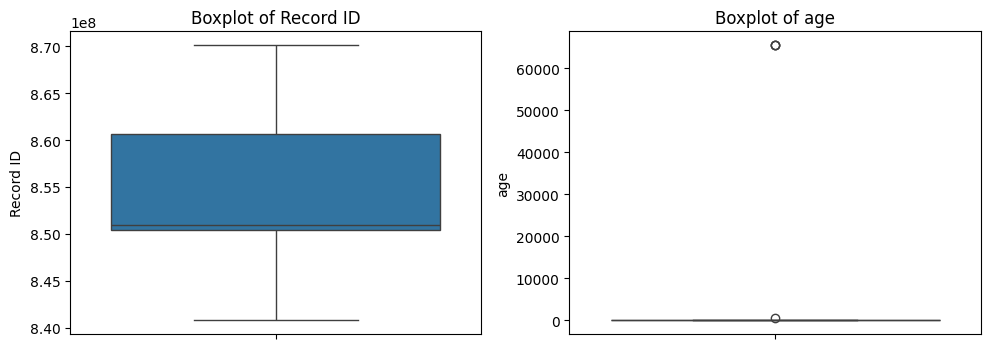


Missing Values After Imputation:
 Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtyp

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

file_path =r"C:\Users\sarayu krishna\Downloads\Lab Session Data.xlsx"
excel_data = pd.ExcelFile(file_path)
thyrdata = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

def identify_types(data):
    return data.dtypes

def enc(data):
    enc_data = data.copy()
    labelenc = {}
    onehot_encoders = {}
    
    for column in data.columns:
        if data[column].dtype == 'object' or data[column].dtype == 'mixed':
            data[column] = data[column].astype(str)
            uniqueval = data[column].nunique()
            if uniqueval <= 10:
                le = LabelEncoder()
                enc_data[column] = le.fit_transform(data[column])
                labelenc[column] = le
            else:
                ohe = OneHotEncoder(sparse_output=False, drop='first')
                enc_cols = ohe.fit_transform(data[[column]])
                enc_df = pd.DataFrame(enc_cols, columns=[f"{column}_{cat}" for cat in ohe.categories_[0][1:]])
                enc_data = pd.concat([enc_data.drop(column, axis=1), enc_df], axis=1)
                onehot_encoders[column] = ohe
                
    return enc_data, labelenc, onehot_encoders

def datarange(data):
    return data.describe().T[['min', 'max']]

def miss_vals(data):
    return data.isnull().sum()

def study_outliers(data):
    numeric_data = data.select_dtypes(include=[np.number])
    outliers = {}
    
    for column in numeric_data.columns:
        q1 = numeric_data[column].quantile(0.25)
        q3 = numeric_data[column].quantile(0.75)
        iqr = q3 - q1
        lb = q1 - 1.5 * iqr
        ub = q3 + 1.5 * iqr
        outliers[column] = numeric_data[(numeric_data[column] < lb) | (numeric_data[column] > ub)]
        
    return outliers

def stats(data):
    numeric_data = data.select_dtypes(include=[np.number])
    means = numeric_data.mean()
    variances = numeric_data.var()
    return means, variances

def plot_outliers(data):
    numeric_data = data.select_dtypes(include=[np.number])
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(numeric_data.columns, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(y=numeric_data[column])
        plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

def impute_values(data):
    for column in data.columns:
        if data[column].isnull().sum() > 0:
            if data[column].dtype == 'object':
                mode = data[column].mode()[0]
                data[column].fillna(mode, inplace=True)
            else:
                outliers = study_outliers(data)
                if len(outliers[column]) > 0:
                    median = data[column].median()
                    data[column].fillna(median, inplace=True)
                else:
                    mean = data[column].mean()
                    data[column].fillna(mean, inplace=True)
    return data

data_types = identify_types(thyrdata)
enc_data, labelenc, onehot_encoders = enc(thyrdata)
data_range = datarange(thyrdata)
missing_values = miss_vals(thyrdata)
outliers_dict = study_outliers(thyrdata)
means, variances = stats(thyrdata)

print("Data Types:\n", data_types)
print("\nData Range:\n", data_range)
print("\nMissing Values:\n", missing_values)
print("\nOutliers:\n", {key: len(value) for key, value in outliers_dict.items()})
print("\nMeans:\n", means)
print("\nVariances:\n", variances)

plot_outliers(thyrdata)

imp_data = impute_values(thyrdata)

missing_vals_after = miss_vals(imp_data)
print("\nMissing Values After Imputation:\n", missing_vals_after)

In [ ]:
# A7
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

file_path = r"C:\Users\sarayu krishna\Downloads\Lab Session Data.xlsx"
excel_data = pd.ExcelFile(file_path)
thyrdata = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

def identify_types(data):
    return data.dtypes

def enc(data):
    enc_data = data.copy()
    labelenc = {}
    onehot_encoders = {}
    
    for column in data.columns:
        if data[column].dtype == 'object' or data[column].dtype == 'mixed':
            data[column] = data[column].astype(str)
            uniqueval = data[column].nunique()
            if uniqueval <= 10:
                le = LabelEncoder()
                enc_data[column] = le.fit_transform(data[column])
                labelenc[column] = le
            else:
                ohe = OneHotEncoder(sparse_output=False, drop='first')
                enc_cols = ohe.fit_transform(data[[column]])
                enc_df = pd.DataFrame(enc_cols, columns=[f"{column}_{cat}" for cat in ohe.categories_[0][1:]])
                enc_data = pd.concat([enc_data.drop(column, axis=1), enc_df], axis=1)
                onehot_encoders[column] = ohe
                
    return enc_data, labelenc, onehot_encoders

def datarange(data):
    return data.describe().T[['min', 'max']]

def miss_vals(data):
    return data.isnull().sum()

def study_outliers(data):
    numeric_data = data.select_dtypes(include=[np.number])
    outliers = {}
    
    for column in numeric_data.columns:
        q1 = numeric_data[column].quantile(0.25)
        q3 = numeric_data[column].quantile(0.75)
        iqr = q3 - q1
        lb = q1 - 1.5 * iqr
        ub = q3 + 1.5 * iqr
        outliers[column] = numeric_data[(numeric_data[column] < lb) | (numeric_data[column] > ub)]
        
    return outliers

def stats(data):
    numeric_data = data.select_dtypes(include=[np.number])
    means = numeric_data.mean()
    variances = numeric_data.var()
    return means, variances

def plot_outliers(data):
    numeric_data = data.select_dtypes(include=[np.number])
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(numeric_data.columns, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(y=numeric_data[column])
        plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

def impute_values(data):
    for column in data.columns:
        if data[column].isnull().sum() > 0:
            if data[column].dtype == 'object':
                mode = data[column].mode()[0]
                data[column].fillna(mode, inplace=True)
            else:
                outliers = study_outliers(data)
                if len(outliers[column]) > 0:
                    median = data[column].median()
                    data[column].fillna(median, inplace=True)
                else:
                    mean = data[column].mean()
                    data[column].fillna(mean, inplace=True)
    return data

def normalizedata(data):
    scaler = MinMaxScaler()
    numeric_data = data.select_dtypes(include=[np.number])
    scaled_data = scaler.fit_transform(numeric_data)
    scaled_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)
    return pd.concat([data.drop(numeric_data.columns, axis=1), scaled_df], axis=1)

data_types = identify_types(thyrdata)
enc_data, labelenc, onehot_encoders = enc(thyrdata)
data_range = datarange(thyrdata)
missing_values = miss_vals(thyrdata)
outliers_dict = study_outliers(thyrdata)
means, variances = stats(thyrdata)

print("Data Types:\n", data_types)
print("\nData Range:\n", data_range)
print("\nMissing Values:\n", missing_values)
print("\nOutliers:\n", {key: len(value) for key, value in outliers_dict.items()})
print("\nMeans:\n", means)
print("\nVariances:\n", variances)

plot_outliers(thyrdata)

imp_data = impute_values(thyrdata)

missing_vals_after = miss_vals(imp_data)

norm_data = normalizedata(imp_data)

print("\nNormalized Data:\n", norm_data.head())

In [ ]:
import pandas as pd
import numpy as np

file_path = r"C:\Users\sarayu krishna\Downloads\Lab Session Data.xlsx"
excel_data = pd.ExcelFile(file_path)
thyrdata = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

def impute_values(data):
    for column in data.columns:
        if data[column].isnull().sum() > 0:
            if data[column].dtype == 'object':
                mode = data[column].mode()[0]
                data[column].fillna(mode, inplace=True)
            else:
                outliers = study_outliers(data)
                if len(outliers[column]) > 0:
                    median = data[column].median()
                    data[column].fillna(median, inplace=True)
                else:
                    mean = data[column].mean()
                    data[column].fillna(mean, inplace=True)
    return data

def calculate_similarity_measures(data):
    vector1 = data.iloc[0]
    vector2 = data.iloc[1]
    
    binary_attr = [col for col in data.columns if set(data[col].unique()) <= {0, 1}]
    binary_v1 = vector1[binary_attr]
    binary_v2 = vector2[binary_attr]
    
    f11 = np.sum((binary_v1 == 1) & (binary_v2 == 1))
    f01 = np.sum((binary_v1 == 0) & (binary_v2 == 1))
    f10 = np.sum((binary_v1 == 1) & (binary_v2 == 0))
    f00 = np.sum((binary_v1 == 0) & (binary_v2 == 0))
    
    jc = f11 / (f01 + f10 + f11)
    smc = (f11 + f00) / (f00 + f01 + f10 + f11)
    
    return jc, smc

thyrdata = impute_values(thyrdata)

binary_data = pd.get_dummies(thyrdata, drop_first=True)

jc, smc = calculate_similarity_measures(binary_data)

print(f"Jaccard Coefficient (JC): {jc}")
print(f"Simple Matching Coefficient (SMC): {smc}")

In [ ]:
#A9
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

file_path = r"C:\Users\sarayu krishna\Downloads\Lab Session Data.xlsx"
excel_data = pd.ExcelFile(file_path)
thyrdata = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
def enc(data):
    enc_data = data.copy()
    labelenc = {}
    onehot_encoders = {}
    
    for column in data.columns:
        if data[column].dtype == 'object' or data[column].dtype == 'mixed':
            data[column] = data[column].astype(str)
            uniqueval = data[column].nunique()
            if uniqueval <= 10:
                le = LabelEncoder()
                enc_data[column] = le.fit_transform(data[column])
                labelenc[column] = le
            else:
                ohe = OneHotEncoder(sparse_output=False, drop='first')
                enc_cols = ohe.fit_transform(data[[column]])
                enc_df = pd.DataFrame(enc_cols, columns=[f"{column}_{cat}" for cat in ohe.categories_[0][1:]])
                enc_data = pd.concat([enc_data.drop(column, axis=1), enc_df], axis=1)
                onehot_encoders[column] = ohe
                
    return enc_data, labelenc, onehot_encoders

def impute_values(data):
    for column in data.columns:
        if data[column].isnull().sum() > 0:
            if data[column].dtype == 'object':
                mode = data[column].mode()[0]
                data[column].fillna(mode, inplace=True)
            else:
                outliers = study_outliers(data)
                if len(outliers[column]) > 0:
                    median = data[column].median()
                    data[column].fillna(median, inplace=True)
                else:
                    mean = data[column].mean()
                    data[column].fillna(mean, inplace=True)
    return data

def cosinesimilarity(data):
    # Select the first two observation vectors
    vector1 = data.iloc[0].values.reshape(1, -1)
    vector2 = data.iloc[1].values.reshape(1, -1)
    
    # Calculate cosine similarity
    cos_sim = cosine_similarity(vector1, vector2)
    
    return cos_sim[0][0]

thyrdata = impute_values(thyrdata)

enc_data, labelenc, onehot_encoders = enc(thyrdata)

cosinesim = cosinesimilarity(enc_data)

print(f"Cosine Similarity: {cosinesim}")

In [ ]:
# A10
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

file_path = r"C:\Users\sarayu krishna\Downloads\Lab Session Data.xlsx"
excel_data = pd.ExcelFile(file_path)
thyrdata = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

def impute_values(data):
    for column in data.columns:
        if data[column].isnull().sum() > 0:
            if data[column].dtype == 'object':
                mode = data[column].mode()[0]
                data[column].fillna(mode, inplace=True)
            else:
                outliers = study_outliers(data)
                if len(outliers[column]) > 0:
                    median = data[column].median()
                    data[column].fillna(median, inplace=True)
                else:
                    mean = data[column].mean()
                    data[column].fillna(mean, inplace=True)
    return data

def enc(data):
    enc_data = data.copy()
    labelenc = {}
    onehot_encoders = {}
    
    for column in data.columns:
        if data[column].dtype == 'object' or data[column].dtype == 'mixed':
            data[column] = data[column].astype(str)
            uniqueval = data[column].nunique()
            if uniqueval <= 10:
                le = LabelEncoder()
                enc_data[column] = le.fit_transform(data[column])
                labelenc[column] = le
            else:
                ohe = OneHotEncoder(sparse_output=False, drop='first')
                enc_cols = ohe.fit_transform(data[[column]])
                enc_df = pd.DataFrame(enc_cols, columns=[f"{column}_{cat}" for cat in ohe.categories_[0][1:]])
                enc_data = pd.concat([enc_data.drop(column, axis=1), enc_df], axis=1)
                onehot_encoders[column] = ohe
                
    return enc_data, labelenc, onehot_encoders

def study_outliers(data):
    numeric_data = data.select_dtypes(include=[np.number])
    outliers = {}
    
    for column in numeric_data.columns:
        q1 = numeric_data[column].quantile(0.25)
        q3 = numeric_data[column].quantile(0.75)
        iqr = q3 - q1
        lb = q1 - 1.5 * iqr
        ub = q3 + 1.5 * iqr
        outliers[column] = numeric_data[(numeric_data[column] < lb) | (numeric_data[column] > ub)]
        
    return outliers

def calculate_jc_smc(data):
    jc_matrix = np.zeros((len(data), len(data)))
    smc_matrix = np.zeros((len(data), len(data)))

    for i in range(len(data)):
        for j in range(len(data)):
            if i != j:
                vector1 = data.iloc[i]
                vector2 = data.iloc[j]
                
                f11 = np.sum((vector1 == 1) & (vector2 == 1))
                f01 = np.sum((vector1 == 0) & (vector2 == 1))
                f10 = np.sum((vector1 == 1) & (vector2 == 0))
                f00 = np.sum((vector1 == 0) & (vector2 == 0))
                
                jc = f11 / (f01 + f10 + f11)
                smc = (f11 + f00) / (f00 + f01 + f10 + f11)
                
                jc_matrix[i, j] = jc
                smc_matrix[i, j] = smc

    return jc_matrix, smc_matrix

def cosinesimilarity(data):
    return cosine_similarity(data)

thyrdata = impute_values(thyrdata)
binary_data, labelenc, onehot_encoders = enc(thyrdata)
binary_data = binary_data.head(20)

jc_matrix, smc_matrix = calculate_jc_smc(binary_data)

cosine_matrix = cosinesimilarity(binary_data)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(jc_matrix, ax=axes[0], cmap='coolwarm', annot=True, fmt=".2f")
axes[0].set_title('Jaccard Coefficient')

sns.heatmap(smc_matrix, ax=axes[1], cmap='coolwarm', annot=True, fmt=".2f")
axes[1].set_title('Simple Matching Coefficient')

sns.heatmap(cosine_matrix, ax=axes[2], cmap='coolwarm', annot=True, fmt=".2f")
axes[2].set_title('Cosine Similarity')

plt.tight_layout()
plt.show()